In [1]:
import subprocess
import itertools
import random
from random import randrange
import statistics 
import matplotlib.pyplot as plt

In [2]:
STUDENT_ID = 12021446
"""
    Evaluation d'une liste d'individus (mots de passe)
"""
def check(student_id , passwords) :
    proc = subprocess.Popen(["./unlock64", str(student_id)] + passwords , stdout = subprocess.PIPE)
    results = []
    while True :
        line = proc.stdout.readline()
        if not line :
            break
        results.append(float(str(line).split("\\t")[1].split("\\r\\n")[0]))
    return results

print(check(STUDENT_ID , ["PASSWORD", "ALGOGEN"]))

def toStr(person):
    length = len(person)
    return "".join(person) + " [" + str(length) + "]"

def evalToStr(evaluation):
    return toStr(evaluation['person'])+ ":" + str(evaluation['score'])

"""
    Trace l'ensemble des individus avec son évalation

"""
def log_list_evaluation(list_evaluation):
    print("### log_population")
    #print('log_population individus_score', list_evaluation)
    idx=0
    for evaluation in list_evaluation:
        #print("log_population : individus_score",individu )
        print(evalToStr(evaluation))

"""
    Affichage sur une courbe de l'historique des valeurs obtenues
    
"""
def display_history(score_history
                ,NB_PERSONS,ELITISM_RATE
                ,PROBA_CROSSOVER
                ,PROBA_MUTATION
                ,PROBA_ADD_GENE
                ,PROBA_REMOVE_GENE):
    # Affichage de l'évolution du score sur une graphe
    xVal,yMax,yAvg=([],[],[])
    yMax1,yAvg1=(0,0)
    idx=1
    for max_avg in score_history:
        xVal.append(idx)
        yMax.append(max_avg[0])
        yAvg.append(max_avg[1])
        if(idx==1):
            yMax1,yAvg1=max_avg[0],max_avg[1]
        idx+=1
    #print(xVal,yMax,yAvg)
    plt.figure(figsize=(20, 15))
    plt.plot(xVal, yMax, 'r')
    plt.plot(xVal, yAvg, 'g')
    plt.xlabel('#Génération')
    #plt.ylabel('max',  color='r')
    #plt.ylabel('moyenne',  color='g')
    plt.text(2, yMax1, r'max', {'color': 'r', 'fontsize': 10, 'rotation':0})
    plt.text(2, yAvg1, r'moyenne', {'color': 'g', 'fontsize': 10, 'rotation':0})
    plt.title('Evolution du score : population :' + str(NB_PERSONS) 
              + ', tx élitisme ' + str(ELITISM_RATE) 
              + ', prb coisement ' + str(PROBA_CROSSOVER) 
              + ', prb mutation ' + str(PROBA_MUTATION) 
              + ', prb ajout gene ' + str(PROBA_ADD_GENE) 
              + ', prb supp. gene ' + str(PROBA_REMOVE_GENE) 
             )
    plt.show()

    
    

[0.328869, 0.344896]


In [3]:
GENES = "ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890"

In [4]:
#print(generationIndividu(18))
#population = generate_population(10)

In [5]:

def generationIndividu(size):
    return [random.choice(GENES) for i in range(size)]

#Le nombre d'individus à générer est passé en paramètre
def generate_population(nbPersons):
    return [generationIndividu(randrange(12,19)) for i in range(nbPersons)]



In [6]:
""" Applique une mutation de géne sur un enfant """

def child_mutation(child, prop_mutee = 1/ 100):
    mutationNB = 1 #randrange(len(child))
    if random.random() < prop_mutee:
        #child1 = toStr(child)
        for idx in range(mutationNB):
            indexGene = randrange(len(child))
            child[indexGene] = random.choice(GENES)
        #child2 = toStr(child)
            #print("mutation : ", child1, child2)
    #print("end mutation")
    #print(toStr(child))
    return child


"""
    Ajout ou suppression aléatoire d'un géne
    On s'assure que l'on a bien entre 12 et 18 genes
"""
def child_add_remove_gene(child, prob_add_gene = 1/100, prob_remove_gene = 1/100):    
    if(len(child)<18):
        if(random.random()<prob_add_gene):
            # Ajouter un gene
            gene = random.choice(GENES)
            indexGene = randrange(len(child))
            child.insert(indexGene, gene)
    if(len(child)>12):
        if(random.random()<prob_remove_gene):
            # Retirer un gene
            indexGene = randrange(len(child))
            child.remove(random.choice(child))
    return child

"""
    Création d'un enfant à partir de deux parents
    Crée l'enfant
        - Soit on croise les caractéristiques des deux parent
        - soit on part d'un des deux parents au hasaard
    Par la suite
        - on applique une mutation de gene sur l'enfant généré (un gene au hasard)
        - on applique retire ou ajoute un géne
    
    
"""
def generate_child(father, mother, prob_corssover, prob_muataion, prob_add_gene, prob_remove_gene):
    child = None
    # Copie des contenus des deux parent (pour ne pas affecter le contenu des parents)
    c_father = father.copy()
    c_mother = mother.copy()
    # Décider si on applique un croisement ou pas (tirage au sort en utilisant la prbabilité de croisement)
    if(random.random() <= prob_corssover):
        #Le nombre de gènes du père sera égal à la longueur du code secret divisé par deux
        nombreGenesPere = len(c_father)//2
        #Le nombre de gènes de la mère sera égal à la longueur du mot - le nombre de gène du père
        nombreGenesMere = len(c_mother)//2
        #print("nb gene :",nombreGenesPere +nombreGenesMere)        
        child = c_father[:nombreGenesPere] + c_mother[nombreGenesMere:]
    else:
        # Choisir aléatoirement entre le pere et la mere
        parents = [c_father, c_mother]
        child = random.choice(parents)
    #print("generate_child step1", toStr(child))
    # Appliquer une mutation de gene (avec la probabilité associée)
    child = child_mutation(child, prob_muataion)
    # Appliquer un ajout et suppression de gene (avec la probabilité associée)
    child = child_add_remove_gene(child, prob_add_gene, prob_remove_gene)
    return child



In [7]:

"""
    Fonction d'évaluation de la population
"""
def evaluate_population(population):    
    #print("evaluation",population)
    listPasswords = []
    for individu in population:
        nextPass = "".join(individu)
        listPasswords.append(nextPass)
    #print("evaluation nb pass:", len(listPasswords))
    result = check(STUDENT_ID , listPasswords)
    #print("evaluation", result)
    idx = 0
    list_evaluation = []
    for person in population:
        newEvaluation = {"person":person, "score":result[idx], "rank":0.0, "p_fitness":0.0, "p_linear":0.0, "rank_score":0}
        #print(item2)
        #list_evaluation.append((person, result[idx]))
        list_evaluation.append(newEvaluation)
        idx+=1
    # Trier les tuples(élement,score) par score décroissant
    sorted_evaluations = sorted(list_evaluation, key=lambda tuple:-1*tuple['score'])
    
    # Déterminer le rang
    rank = 1
    rank_score = len(sorted_evaluations)
    sum_score  = 0
    sum_score_score = 0
    for evaluation in sorted_evaluations:
        evaluation["rank"] = rank
        evaluation["rank_score"]= rank_score
        rank+=1
        rank_score-=1
        sum_score+=evaluation["score"]
        sum_score_score+=evaluation["rank_score"]

    # Calcul des probas : fitness et linéaire
    for evaluation in sorted_evaluations:
        evaluation["p_linear"] = 1*evaluation["rank_score"]/sum_score_score
        evaluation["p_fitness"] = 1*evaluation["score"]/sum_score

    #print("evaluate_population", sorted_evaluations[0:3])
    return sorted_evaluations


In [8]:
"""
    Tirage aléatoire d'un individu
"""
def chose_random_index(list_proba):
    #print("chose_one_person proba :", individus_proba, sum(individus_proba))
    # Tirage aléatoire
    random1 = random.random()    
    sumProba = 0
    index = 0
    for proba in list_proba:
        sumProba = sumProba + proba
        if(sumProba > random1 ):
            return index
        index+=1
    return (index-1)

"""
    Tirage aléatoire d'un couple d'individus
    
"""

def chose_random_pair(list_evaluation, list_proba):
    # Choisir un 1er parent
    index1 = chose_random_index( list_proba)
    parent1 =  (list_evaluation[index1])['person']

    # Choisir un 2e parent
    index2 = chose_random_index( list_proba)
    parent2 =  (list_evaluation[index2])['person']
    return (parent1,parent2)

"""
    Génération d'une liste d'enfant pour créer une nouvelle génératin
    On donne en parametre le nombre d'enfant à créer
    Paramètres
         list_evaluation : liste des évaluation d'individus
         nb_children : nombre d'enfant à générer
         prob_corssover : probabilité de coisement
         prob_muataion : probablilité de croisement
         prob_add_gene : probabilité d'ajout de gene
         prob_remove_gene : probabilité de suppression de gene
"""
def generate_children(list_evaluation, nb_children, prob_corssover, prob_muataion, prob_add_gene, prob_remove_gene):
    list_proba = []
    children = []    
    # Récupérer les probabilité de chaque individu pour le tirage aléatoire
    for evaluation in list_evaluation :
        list_proba.append(evaluation['p_linear'])
    # Initialisation de la liste d'enfant à retourner
    children = []
    for x in range(nb_children):
        # Choix aléatoire d'un couple de deux parent
        (parent1,parent2) = chose_random_pair(list_evaluation, list_proba)
        # Générer un enfant à partir des deux parent choisis
        new_child = generate_child(parent1, parent2, prob_corssover, prob_muataion, prob_add_gene, prob_remove_gene)
        # Ajouter l'enfant généré
        children.append(new_child)
        #print("generate_children", toStr(parent1), toStr(parent2), '->', toStr(new_child))

    #print("selection parents2 ", len(selected_elts), selected_elts)
    # Retour de la liste d'enfants
    return children



"""
  retourne le max et la moyenne des score
""" 
def compute_global_score(list_evaluation):
    # Extraire les scores
    individus_score = []
    for evaluation in list_evaluation :
        individus_score.append(evaluation['score'])
    current_max,current_avg = (max(individus_score), statistics.mean(individus_score))
    return (current_max,current_avg)

In [9]:
NB_PERSONS = 1000             # Nombre d'individus de la population
PROBA_MUTATION = 1            # Probabilité de mutation d'un gene
PROBA_CROSSOVER = 0.99        # Probabilité de croisement des deux parents
PROBA_ADD_GENE = 0.2          # Probabilité d'ajout d'un gene
PROBA_REMOVE_GENE = 0.2       # Probabilité de suppression d'un gene
ELITISM_RATE = 0.2            # Taux d'élitime : correspond au taux de la population à garder pour la génération suivante (les n meilleurs individus en terme de score)
TARGET_SCORE= 0.999            # Seuil du score à partir duquel on arrete le prgramme
MAX_GENERATIONS = 10000       # Seuil du nombre d'itération à partir duquelon arrete le programme


# Initialisation de la population
population = generate_population(NB_PERSONS)
idx_generation = 1
#score = 0
current_max = 0
score_history = []
# Nombre d'individus gardés d'office d'une génération à la suivante (on trie ceux ayant les meilleurs score)
nb_to_keep = int(NB_PERSONS*ELITISM_RATE)
# Nombre d'enfant à générer pour chaque nouvelle génération : population totale - nb d'individus gardés d'office d'une génération à l'autre
nb_children = NB_PERSONS - nb_to_keep

print("------ Begin nb_to_keep = ", nb_to_keep , " nb_children to produce = " , nb_children)

while idx_generation < MAX_GENERATIONS and 1*current_max < TARGET_SCORE :
    #print("before  evaluation", population)
    list_evaluation = evaluate_population(population)
     # log de la population
    if(False or idx_generation%100==0):
        log_list_evaluation(list_evaluation)
    # Max et moyenne des scores
    current_max,current_avg = compute_global_score(list_evaluation)
    score_history.append((current_max,current_avg))
    print("generation", idx_generation ,"score max:",current_max, "score moyen:",current_avg, len(list_evaluation))

    # Ré-initialiser la population
    population = []
    # Garder ceux qui ont obetnu les meilleurs score (on ne les modifie pas)
    # Applicaiton de l'élitisme : on garde dans la population les meilleurs individus qui sont gardé de-facto
    #print("step3, population size", len(population))
    best_elts = list_evaluation[:nb_to_keep]
    for evaluation in best_elts:
        #print("first_elts", toStr(individu), score)
        population.append(evaluation['person'])
     
    #print("step4, population size", len(population))
    # Générer les enfants
    children = generate_children(list_evaluation, nb_children, PROBA_CROSSOVER, PROBA_MUTATION, PROBA_ADD_GENE, PROBA_REMOVE_GENE)
    population.extend(children)    
    #print("step5, population size", len(population), "ze_first", toStr(population[0]))
    idx_generation+=1


theBest = list_evaluation[0]
print("Individu le plus proche",  evalToStr(theBest) )
                    
    


------ Begin nb_to_keep =  200  nb_children to produce =  800
generation 1 score max: 0.670771 score moyen: 0.46951586 1000
generation 2 score max: 0.670771 score moyen: 0.503395846 1000
generation 3 score max: 0.694615 score moyen: 0.52873172 1000
generation 4 score max: 0.729462 score moyen: 0.552062058 1000
generation 5 score max: 0.74693 score moyen: 0.569121543 1000
generation 6 score max: 0.752148 score moyen: 0.588766119 1000
generation 7 score max: 0.792474 score moyen: 0.606280986 1000
generation 8 score max: 0.792474 score moyen: 0.620749529 1000
generation 9 score max: 0.818107 score moyen: 0.637758933 1000
generation 10 score max: 0.818107 score moyen: 0.649299075 1000
generation 11 score max: 0.824922 score moyen: 0.664343838 1000
generation 12 score max: 0.824922 score moyen: 0.674469694 1000
generation 13 score max: 0.824922 score moyen: 0.682405256 1000
generation 14 score max: 0.824922 score moyen: 0.689608007 1000
generation 15 score max: 0.824922 score moyen: 0.69701

generation 101 score max: 0.90536 score moyen: 0.774883219 1000
generation 102 score max: 0.90536 score moyen: 0.775399715 1000
generation 103 score max: 0.90536 score moyen: 0.775448663 1000
generation 104 score max: 0.90536 score moyen: 0.775142397 1000
generation 105 score max: 0.90536 score moyen: 0.780053592 1000
generation 106 score max: 0.90536 score moyen: 0.779580712 1000
generation 107 score max: 0.916653 score moyen: 0.779107178 1000
generation 108 score max: 0.916653 score moyen: 0.776128912 1000
generation 109 score max: 0.916653 score moyen: 0.779532282 1000
generation 110 score max: 0.916653 score moyen: 0.7781011290000001 1000
generation 111 score max: 0.916653 score moyen: 0.77989286 1000
generation 112 score max: 0.916653 score moyen: 0.781889122 1000
generation 113 score max: 0.916653 score moyen: 0.780246113 1000
generation 114 score max: 0.916653 score moyen: 0.776392147 1000
generation 115 score max: 0.916653 score moyen: 0.780200707 1000
generation 116 score max:

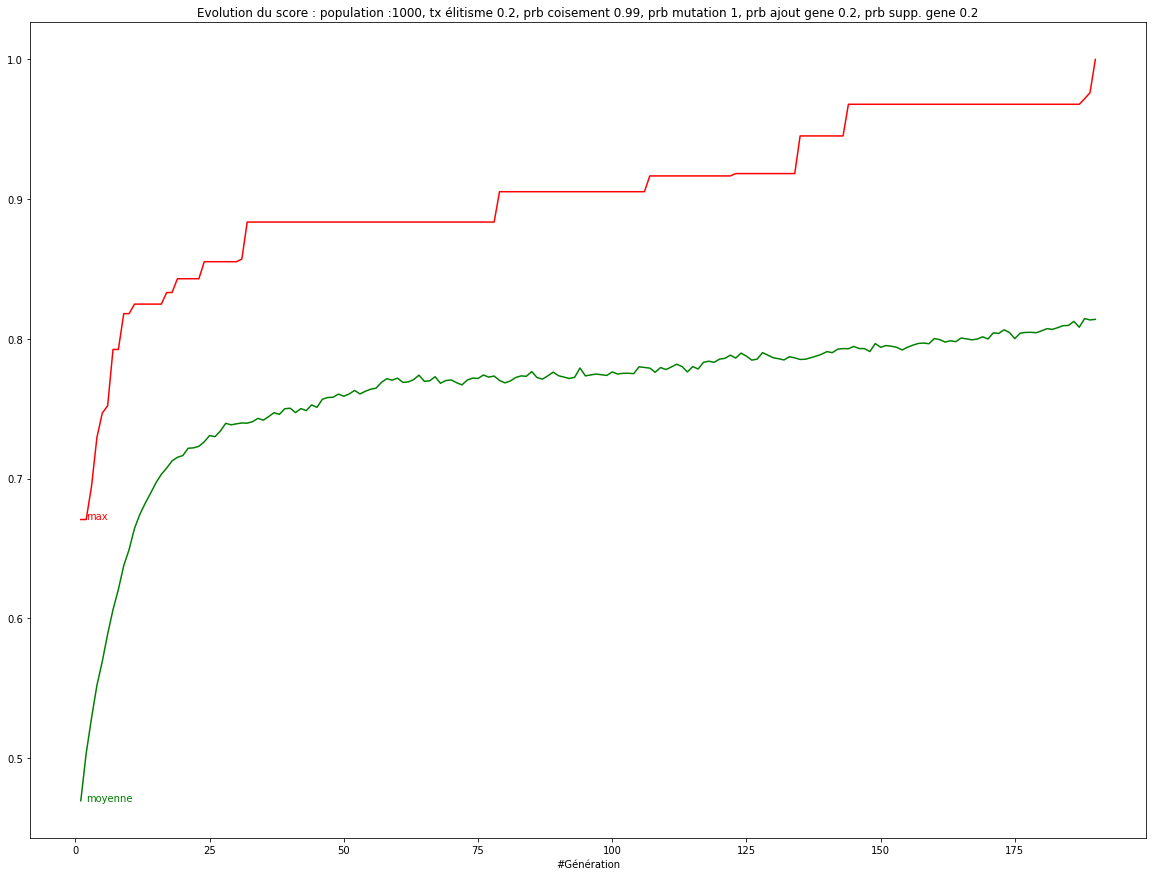

In [10]:


display_history(score_history
    ,NB_PERSONS,ELITISM_RATE
    ,PROBA_CROSSOVER
    ,PROBA_MUTATION
    ,PROBA_ADD_GENE
    ,PROBA_REMOVE_GENE)
